<a href="https://colab.research.google.com/github/MLP-deepdreamteam/Practice_captioning/blob/branch_%EB%B0%B1%EC%9A%B4%EC%B2%A0/coco_custom30k_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
#  gs://coco_custom30k/custom30k.zip

In [6]:
from zipfile import ZipFile

In [7]:
# !wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip # 전체롤드

In [8]:
! gsutil cp gs://coco_custom30k/custom30k.zip /content/coco_custom30k

Copying gs://coco_custom30k/custom30k.zip...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

\ [1 files][  4.6 GiB/  4.6 GiB]   87.3 MiB/s                                   
Operation completed over 1 objects/4.6 GiB.                                      


In [9]:
with ZipFile("/content/coco_custom30k") as zfile:
  zfile.extractall(".")

In [10]:
# with GFile("gs://coco_custom30k/custom30k.zipl", "rb") as f:
#     dataset = pickle.load(f)

In [11]:
import pandas as pd
import json
# i = 0
with open(f'/content/drive/MyDrive/coco_ann2017/annotations/captions_train2017.json', 'r') as f: # 마운트 확인
    data = json.load(f)
    data = data['annotations']

img_cap_pairs = []

for sample in data:
    img_name = '%012d.jpg' % sample['image_id']
    img_cap_pairs.append([img_name, sample['caption'],sample['image_id']])

captions = pd.DataFrame(img_cap_pairs, columns=['image', 'caption','image_id'])
captions['image'] = captions['image'].apply(
    lambda x: f'/content/drive/MyDrive/coco_dataset//train2017/{x}'
)
captions = captions.reset_index(drop=True)
print(captions.head())



                                               image  \
0  /content/drive/MyDrive/coco_dataset//train2017...   
1  /content/drive/MyDrive/coco_dataset//train2017...   
2  /content/drive/MyDrive/coco_dataset//train2017...   
3  /content/drive/MyDrive/coco_dataset//train2017...   
4  /content/drive/MyDrive/coco_dataset//train2017...   

                                             caption  image_id  
0  A bicycle replica with a clock as the front wh...    203564  
1  A room with blue walls and a white sink and door.    322141  
2  A car that seems to be parked illegally behind...     16977  
3  A large passenger airplane flying through the ...    106140  
4  There is a GOL plane taking off in a partly cl...    106140  


In [12]:
df_captions_in_COCO = captions.groupby(["image", "image_id"])['caption'].apply(list).reset_index()


df_captions_in_COCO.shape


# # display(df_captions_in_COCO)

## sample 30k 생성용 
# # caption 길이가 5 이상이면 drop
# df_captions_in_COCO = df_captions_in_COCO[df_captions_in_COCO['caption'].apply(len) < 6]

# sample_30k  = df_captions_in_COCO.sample(30_000)




(118287, 3)

In [13]:
# df to dict


mypath_dict = {row['image']: row['caption'] for _, row in df_captions_in_COCO.iterrows()}

# Or, use the 'image_id' column as the key
myid_dict = {row['image_id']: row['caption'] for _, row in df_captions_in_COCO.iterrows()}

In [14]:

import os
sample_path ="/content/content/custom_train_coco_30k"
sample_train = os.listdir(sample_path)

# print(sample_train[:3])

In [15]:


my_sample_path = []
my_image_id= []

for jpg_file in sample_train:
    my_sample_path.append(sample_path+"/" +jpg_file)


    # exctract id in sample
    image_id = int(jpg_file.split('.')[0])
    my_image_id.append(image_id)

print(my_sample_path[:2],"\n", len(my_sample_path))
print()
print(my_image_id[:3], len(my_image_id))



['/content/content/custom_train_coco_30k/000000333532.jpg', '/content/content/custom_train_coco_30k/000000325040.jpg'] 
 30000

[333532, 325040, 232329] 30000


In [16]:
# Function to check if the image ID is in the my_image_id list
def keep_id(image_id):
    return image_id in my_image_id

# Create a custom dictionary with only the partial image IDs
my_custom_train_set = {k: v for k, v in myid_dict.items() if keep_id(k)}

In [17]:
updated_dict = {}
for k, v in my_custom_train_set.items():
    
    new_key = sample_path+"/{:012d}.jpg".format(k)
    updated_dict[new_key] = v


In [18]:
len(updated_dict)

30000

In [19]:
# 샘플 확인용

imgIdss= list(updated_dict.keys())
import random
random.shuffle(imgIdss)


Woman holding a purse and walking a dog passing in front of a big building. 
A black and white photo of a man petting a horse.
A blond woman hold a red Wii controller. 
A group of baseball players standing on top of a field.
a mama goat and her baby walking on a slope
a suitcase has a bunch of stickers all over it
A young girl is taking a bite of a slice of pizza. 
A man riding a dirt bike on top of a dirt road.
An open stove oven has an open umbrella facing it
This traffic signal has a green light for bikes to go through the intersection. 
Group of horsed tied to line while standing in grassy area.
A woman holding a digital camera in front of a mirror.


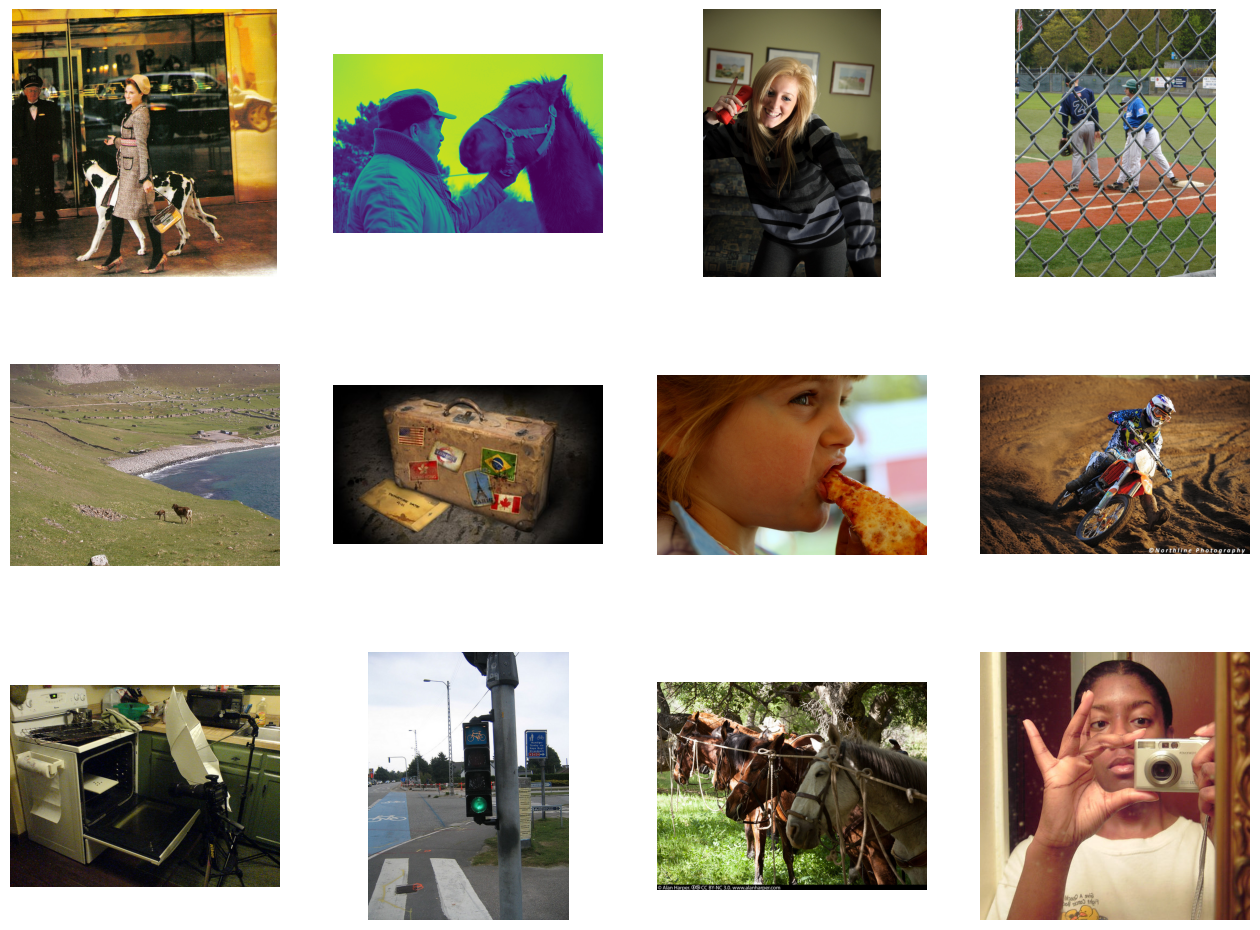

In [20]:
import matplotlib.pyplot as plt
import skimage.io as io

# 랜덤 파일 읽기, imgidss 확인!! -전체코코인지 일부인지
fig = plt.gcf()
fig.set_size_inches(16, 16)

next_pix = imgIdss
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:12]):
    
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')
    I = io.imread(img_path)
    plt.imshow(I)
    print( updated_dict[img_path][0])

plt.show()

In [74]:
dataset =updated_dict


list(dataset.keys())[:10]


['/content/content/custom_train_coco_30k/000000000025.jpg',
 '/content/content/custom_train_coco_30k/000000000081.jpg',
 '/content/content/custom_train_coco_30k/000000000089.jpg',
 '/content/content/custom_train_coco_30k/000000000092.jpg',
 '/content/content/custom_train_coco_30k/000000000151.jpg',
 '/content/content/custom_train_coco_30k/000000000154.jpg',
 '/content/content/custom_train_coco_30k/000000000165.jpg',
 '/content/content/custom_train_coco_30k/000000000208.jpg',
 '/content/content/custom_train_coco_30k/000000000250.jpg',
 '/content/content/custom_train_coco_30k/000000000294.jpg']

In [75]:
import string

def clean_caption(caption):
    caption = caption.lower()
    caption = caption.translate(str.maketrans("", "", string.punctuation))
    return caption

cleaned_dataset = {key: [clean_caption(caption) for caption in caption_list] for key, caption_list in dataset.items()}


len (cleaned_dataset)

30000

In [77]:
from collections import Counter

def count_words(dataset):
    all_words = []
    for captions in dataset.values():
        for caption in captions:
            all_words.extend(caption.split())
    return Counter(all_words)

uncleaned_word_counts = count_words(dataset)
cleaned_word_counts = count_words(cleaned_dataset)

print("Most common words (uncleaned):", uncleaned_word_counts.most_common(20 ))
print("Most common words (cleaned):", cleaned_word_counts.most_common(20))

Most common words (uncleaned): [('a', 160652), ('A', 87387), ('on', 53824), ('of', 51651), ('in', 46126), ('the', 43750), ('with', 38673), ('and', 35078), ('is', 24259), ('man', 17441), ('to', 17336), ('sitting', 13391), ('at', 10719), ('standing', 10703), ('are', 10240), ('next', 9343), ('white', 8884), ('an', 8838), ('people', 8748), ('woman', 8140)]
Most common words (cleaned): [('a', 248043), ('on', 54733), ('of', 52012), ('the', 50714), ('in', 46548), ('with', 38953), ('and', 35331), ('is', 24792), ('man', 18581), ('to', 17399), ('sitting', 13488), ('an', 12624), ('two', 12262), ('at', 10827), ('standing', 10796), ('people', 10608), ('are', 10416), ('next', 9361), ('white', 9181), ('woman', 8695)]


In [78]:
from itertools import chain
from tensorflow.keras.preprocessing.text import Tokenizer

# 30K 단어 토큰화 # vocab _len 15k만들기는 아직 보류

def tokenize_mycaption(dataset, max_words=15000):
  
  flatten_list = list(chain.from_iterable(dataset.values())) #[[1,3],[4,8]] = [1,3,4,8]

  tokenizer = Tokenizer( oov_token='<oov>') # For those words which are not found in word_index
  tokenizer.fit_on_texts(flatten_list)
  tokenizer.word_index['<start>'] = len(tokenizer.word_index) + 1
  tokenizer.word_index['<end>'] = len(tokenizer.word_index) + 1
  total_words = len(tokenizer.word_index) + 1
  total_words = len(tokenizer.word_index) + 1
  print("Vocabulary length: ", total_words)
  print(list(tokenizer.word_index.keys())[:16])
  return tokenizer, total_words

tokenizer, total_words = tokenize_mycaption(cleaned_dataset, max_words=15000)


Vocabulary length:  16116
['<oov>', 'a', 'on', 'of', 'the', 'in', 'with', 'and', 'is', 'man', 'to', 'sitting', 'an', 'two', 'at', 'standing']


In [80]:
tokenizer.word_index['a']
tokenizer.word_index['<start>']
tokenizer.word_index['<end>']


16115

In [81]:
 # 반복 실행 주의, 
newdataset = {k: ['<start> '   +cap+ ' <end>' for cap in caps] for k,caps in cleaned_dataset.items()}

print(len(newdataset))
print(list(newdataset.items())[0])
print(len(list(newdataset.values())[0]))

cleaned_dataset =newdataset

30000
('/content/content/custom_train_coco_30k/000000000025.jpg', ['<start> a giraffe eating food from the top of the tree <end>', '<start> a giraffe standing up nearby a tree  <end>', '<start> a giraffe mother with its baby in the forest <end>', '<start> two giraffes standing in a tree filled area <end>', '<start> a giraffe standing next to a forest filled with trees <end>'])
5


In [54]:
import itertools


# 임시 : sample은 개수

SAMPLE_NUM=10
testsample_dict= dict(itertools.islice(dataset.items(), SAMPLE_NUM))


# sample 쓴다고 가정
# dataset = testsample_dict

In [55]:
# # 해당 3만개 데이터에 대한 tokenizer 저장  (15691 단어 수)

# import pickle

# # Save the configuration and weights to a file
# with open(f"my_tokenizer_{my_part}.pkl", "wb") as f:
#     pickle.dump({"tokenizer": tokenizer}, f)

In [56]:
# Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
    # featurewise_center=False,
    # samplewise_center=False,
    # featurewise_std_normalization=False,
    # samplewise_std_normalization=False,
    # zca_whitening=False,
    # zca_epsilon=1e-06,
    # rotation_range=0,
    width_shift_range=0.1, # changed
    height_shift_range=0.1, # changed
    # brightness_range=None,
    shear_range=0.1, # changed
    zoom_range=0.1, # changed
    # channel_shift_range=0.0,
    # fill_mode='nearest',
    # cval=0.0,
    horizontal_flip=True, # changed
    vertical_flip=False,
    # rescale=None,
    # preprocessing_function=None,
    # data_format=None,
    # validation_split=0.0,
    # interpolation_order=1,
    # dtype=None
)

In [59]:
# Encoder 인 Xception 모델 호출, image_feature, imsize, error_imgs 선언, img_preprocess (이미지 사이즈 model 에 맞게 + resize, + 정규화 + feature 추출)


from tensorflow.keras.applications.xception import Xception
from tqdm.notebook import tqdm
import cv2
import numpy as np

model = Xception(include_top=False, pooling='avg',  weights='imagenet')

# model.compile()

image_features = {}

imsize = (299,299)
# dataset.keys()
error_imgs = []
def img_preprocess(dataset=dataset,imsize=imsize, model=model, aug =True  ):
    for img in tqdm(list(dataset.keys())):
        try:
            image = io.imread(img)
            if image.ndim != 3:
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

            # Resize each image size 299 x 299 or 224 X 224
            image = cv2.resize(image, (imsize[1], imsize[0]))
            image = np.expand_dims(image, axis=0)
            if aug == True:
              augmented_image = data_gen.flow(image, batch_size=1).next()
              image = augmented_image

            # Normalize image pixels
            image = image / 127.5
            image = image - 1.0

            # Extract features from image
            feature = model.predict(image)
            image_features[img] = feature

        except:
            print(f"Failed to process image {img}")
            error_imgs.append[img]

In [ ]:
# MobileNet Feature extraction 용
from tensorflow.keras.layers import GlobalAveragePooling2D

IMAGE_SHAPE=(224, 224, 3)
mobilenet = tf.keras.applications.MobileNetV3Small(
    input_shape=IMAGE_SHAPE,
    include_top=False,
    include_preprocessing=True)
mobilenet.trainable=False

x = mobilenet.output
x = GlobalAveragePooling2D()(x)

modified_mobilenetv3small = Model(inputs=mobilenet.input, outputs=x)

# img_preprocess(dataset, imsize =IMAGE_SHAPE, model = modified_mobilenetv3small)


In [ ]:
# from tensorflow.keras.layers import GlobalAveragePooling2D

IMAGE_SHAPE=(224, 224, 3)

vgg16 = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
) 
vgg16.trainable=False

x = vgg16.output
x = GlobalAveragePooling2D()(x)

modified_vgg16 = Model(inputs=vgg16.input, outputs=x)

1

In [87]:
from tensorflow.io.gfile import GFile
import pickle

with GFile("gs://coco_custom30k/my_feature_30000_no_aug.pkl", "rb") as f:
  load_feature_file = pickle.load(f)


load_features = list(load_feature_file.values())[0]

print(type(load_features))
keys = list(load_features.keys())
values =list(load_features.values())


load_feature_dict  = {}

my_filepath_key =[sample_path+"/"+ key[-16:] for key in keys]

for i in range(len(keys)):
    load_feature_dict[my_filepath_key[i]] = values[i]


len(load_feature_dict)

first_item_key = list(load_feature_dict.keys())[0]
first_item_value = list(load_feature_dict.values())[0]

# io.imread(first_item_key)


# 다시 키를 내경로에 맞게 수정하는 과정 필요


# plt.imshow(first_item_value)# feature = >이미지 decode 필요한데 불가능한듯. GAN 이나, 추가적인 decoder 모델 필요

print(first_item_value.shape)

<class 'dict'>
(1, 2048)


In [88]:
image_features = load_feature_dict


print("Image features length: ", len(image_features))

Image features length:  30000


In [90]:
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)
    
max_length = max_length(cleaned_dataset)
max_length

50

In [132]:
#create input-output sequence pairs from the image description.
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np


def data_generator(descriptions, features, tokenizer, max_length):
    while 1:
        for key, description_list in descriptions.items():
        #  description 인 경우 10,000개 
            feature = features[key][0]
            # print("features",type(features), len(features), list(features.keys())[0]) #  features 자체는 image_features dict
            # print("feature",type(feature), len(feature))
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield ([input_image, input_sequence], output_word)
            

def create_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()
    num=0
    # walk through each description for the image
    for desc in desc_list: # desc_list 는 caption의 list를 뜻함
        
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # print(len(seq))
        
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # print("in_seq",in_seq)
            
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=total_words)[0]
            # print("out_seq",out_seq, "\n", len(out_seq))
            
            # store
            # append num
            num+=1
            X1.append(feature) # image features
            X2.append(in_seq)  # Caption input
            y.append(out_seq)  # Caption output
    # print("append 한 횟수 :",num)

    return np.array(X1), np.array(X2), np.array(y)


In [133]:
gen = data_generator(dataset, image_features, tokenizer, max_length)

for i , a in enumerate(gen):
  print(i,":", a[0][0].shape,a[0][1].shape, a[1].shape )
  if i >2 :
    break

# model.fit(gen,epochs,steps_per_epoch)

0 : (39, 2048) (39, 50) (39, 16116)
1 : (38, 2048) (38, 50) (38, 16116)
2 : (50, 2048) (50, 50) (50, 16116)
3 : (48, 2048) (48, 50) (48, 16116)


In [112]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Input, Dropout, Attention, add
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model


# define the captioning model
def define_model(total_words, max_length):

    # features from the CNN model squeezed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,)) #for Xception (1,2048)
    # inputs1 = Input(shape=(512,))# for VGG 512
    # inputs1 = Input(shape=(576,))# for mobilenetv3 small

    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(total_words, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(total_words, activation='softmax')(decoder2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)

    return model


In [113]:
# define our model
import os

try:
  os.mkdir("models")
except:
  print("models folder already exists")

# testsample_dict
caption_model = define_model(total_words, max_length)


models folder already exists
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 50)]         0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 50, 256)      4125696     ['input_10[0][0]']               
                                                                                                  
 dropout_8 (Dropout)            (None, 2048)         0           ['input_9[0][0]']                
                                                               

In [114]:
fit_num=0

BATCH_SIZE = 32


def train_our_model(dataset,batch =BATCH_SIZE, model =caption_model):
  global fit_num
  fit_num+=1

  print('Dataset: ', len(dataset))
  print('Descriptions: train=', len(dataset))
  print('Photos: train=', len(image_features))
  print('Vocabulary Size:', total_words)
  print('Description Length: ', max_length)

  epochs=1
  steps = len(dataset)

  # making a directory models to save our models

  # yield  []
  for i in range(epochs):
      generator = data_generator(dataset, image_features, tokenizer, max_length)
      # model.fit(generator, epochs=1, steps_per_epoch= steps, verbose=1, batch_size=BATCH_SIZE)
      history = model.fit(generator, epochs=5, steps_per_epoch= steps, verbose=1, batch_size=BATCH_SIZE)      
    # model.fit(generator, epochs=5, steps_per_epoch= steps, verbose=1, batch_size=BATCH_SIZE, validation_set = validation_loss = )      

      model.save("models/model_" + str(i) +str(fit_num)+ ".h5")


In [131]:
train_our_model(cleaned_dataset)

Dataset:  30000
Descriptions: train= 30000
Photos: train= 30000
Vocabulary Size: 16116
Description Length:  50
Epoch 1/5
   26/30000 [..............................] - ETA: 6:25:09 - loss: 6.4961

KeyboardInterrupt: ignored

In [115]:
# caption_model.summary()
# caption_model.save("test_model.h5")
# # loaded_model = tf.keras.saving.load_model("/content/drive/MyDrive/3조/Models/model_01_vgg16.h5")
# loaded_model = tf.keras.saving.load_model("/content/drive/MyDrive/3조/Models/model_01_mobile.h5")



# loaded_model.summary()

In [126]:

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob
img_paths = []
# for filename in glob.glob('./drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/*.jpg'): #assuming jpg
for filename in glob.glob('/content/drive/Shareddrives/coco_dataset/destination_folder/train_folder01/*.jpg'): #assuming jpg

    # im=Image.open(filename)
    # print(filename)
    # print(im)
    img_paths.append(filename)

    if len(img_paths)>10:
      break
print(img_paths)


['/content/drive/Shareddrives/coco_dataset/destination_folder/train_folder01/000000012497.jpg', '/content/drive/Shareddrives/coco_dataset/destination_folder/train_folder01/000000048103.jpg', '/content/drive/Shareddrives/coco_dataset/destination_folder/train_folder01/000000044251.jpg', '/content/drive/Shareddrives/coco_dataset/destination_folder/train_folder01/000000018908.jpg', '/content/drive/Shareddrives/coco_dataset/destination_folder/train_folder01/000000031680.jpg', '/content/drive/Shareddrives/coco_dataset/destination_folder/train_folder01/000000046276.jpg', '/content/drive/Shareddrives/coco_dataset/destination_folder/train_folder01/000000026152.jpg', '/content/drive/Shareddrives/coco_dataset/destination_folder/train_folder01/000000020063.jpg', '/content/drive/Shareddrives/coco_dataset/destination_folder/train_folder01/000000041711.jpg', '/content/drive/Shareddrives/coco_dataset/destination_folder/train_folder01/000000041918.jpg', '/content/drive/Shareddrives/coco_dataset/destina

In [129]:

def extract_features(filename, model):
        try:
            image = Image.open(filename)

        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        # image = image.resize((299,299))
        image = image.resize((224,224))

        image = np.array(image)
        
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None


def generate_desc(model, tokenizer, photo, max_length):
    in_text = '<start>'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        
        if word is None:
            break
        in_text += ' ' + word
        
        if word == '<end>':
            in_text = in_text[:-3]  +"<"+in_text [-3:] + ">"
            break
    return in_text


    


In [119]:
from tensorflow.keras.applications.xception import Xception
xception_model = Xception(include_top=False, pooling="avg")

# 확인할때 vgg model 선언 , 


83683744/83683744 [==============================] - 1s 0us/step


1/1 [==============================] - 0s 244ms/step



<start> a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a


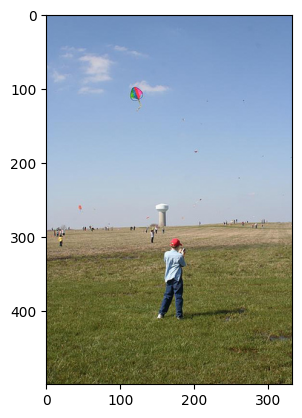

In [130]:
# 윤성 230407_vgg16->xception_model
#  photo = extract_features(img_paths[0], modified_vgg16)

# photo = extract_features(img_paths[0], xception_model)
photo = extract_features(img_paths[0], xception_model)

img = Image.open(img_paths[0])
description = generate_desc(caption_model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)